In [1]:
import matplotlib.pyplot as plt
import numpy as np
from emus import usutils as uu
from emus import emus, iter_avar

%load_ext nb_black
%matplotlib inline
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

## Application: 1D Umbrella Sampling of the Alanine Dipeptide

In [4]:
# Define Simulation Parameters
T = 310  # Temperature in Kelvin
k_B = 1.9872041e-3  # Boltzmann factor in kcal/mol
kT = k_B * T
meta_file = "cv_meta.txt"  # Path to Meta File
dim = 1  # 1 Dimensional CV space.
period = 360  # Dihedral Angles periodicity
nbins = 50  # Number of Histogram Bins.

# Load data
psis, cv_trajs, neighbors = uu.data_from_meta(
    meta_file, dim, T=T, k_B=k_B, period=period
)

# Calculate the partition function for each window
z, F = emus.calculate_zs(psis, neighbors=neighbors, n_iter=50)
N = len(z)
# Calculate error in each z value from the first iteration.
zerr, _, ziat = iter_avar.calc_partition_functions(psis, z, neighbors=neighbors)


# Calculate the PMF from EMUS
domain = (-180.0, 180.0)  # Range of dihedral angle values
pmf, edges = emus.calculate_pmf(
    cv_trajs, psis, domain, z, nbins=nbins, kT=kT, use_iter=True
)  # Calculate the pmf


# Estimate probability of being in C7 ax basin and perform error analysis
fdata = [((traj > 25) & (traj < 100)).flatten() for traj in cv_trajs]
probC7ax = emus.calculate_avg(psis, z, fdata, use_iter=True)
probC7ax_err, probC7ax_contribs, probC7ax_iats = iter_avar.calc_avg_ratio(
    psis, z, fdata, neighbors=neighbors
)
probC7ax_std = np.sqrt(probC7ax_err)


<IPython.core.display.Javascript object>

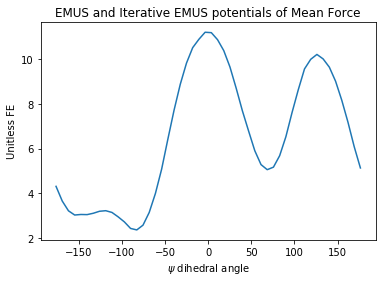

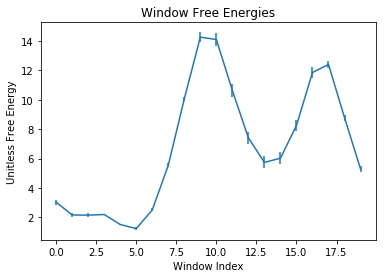

Iterative EMUS Probability of C7ax basin is 0.006528 +/- 0.002661


<IPython.core.display.Javascript object>

In [5]:
# ~~~ Data Output Section ~~~ #

# Plot the EMUS, Iterative EMUS pmfs.
pmf_centers = (edges[0][1:] + edges[0][:-1]) / 2.0
plt.figure()
plt.plot(pmf_centers, pmf)
plt.xlabel(r"$\psi$ dihedral angle")
plt.ylabel("Unitless FE")
plt.title("EMUS and Iterative EMUS potentials of Mean Force")
plt.show()

# Plot the relative normalization constants as fxn of max iteration.
plt.errorbar(np.arange(len(z)), -np.log(z), yerr=np.sqrt(zerr) / z)
plt.xlabel("Window Index")
plt.ylabel("Unitless Free Energy")
plt.title("Window Free Energies")
plt.show()

# Print the C7 ax basin probability
print(
    "Iterative EMUS Probability of C7ax basin is %f +/- %f" % (probC7ax, probC7ax_std)
)